(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


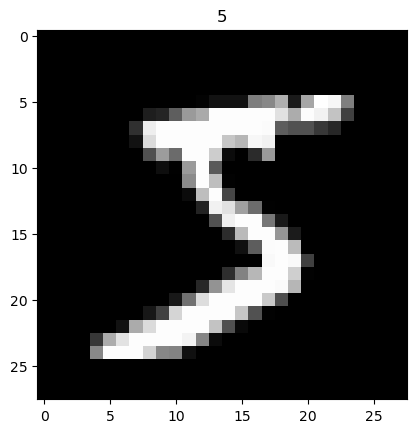

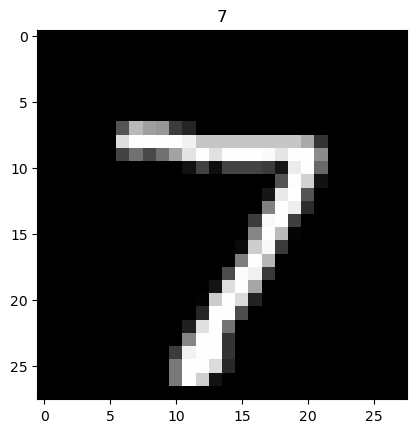

In [6]:
import gzip
import os
import numpy as np
from torch.utils.data import Dataset
from torchvision import datasets, transforms

# 加载MNIST数据集

# #************************************a2torchloadlocalminist*********************************************************
class DealDataset(Dataset):
    """
        读取数据、初始化数据
    """

    def __init__(self, folder, data_name, label_name, transform=None):
        (train_set, train_labels) = load_data(folder, data_name,
                                              label_name)  # 其实也可以直接使用torch.load(),读取之后的结果为torch.Tensor形式
        self.train_set = train_set
        self.train_labels = train_labels
        self.transform = transform

    def __getitem__(self, index):
        img, target = self.train_set[index], int(self.train_labels[index])
        if self.transform is not None:
            img = self.transform(img)
        return img, target

    def __len__(self):
        return len(self.train_set)


def load_data(data_folder, data_name, label_name):
    with gzip.open(os.path.join(data_folder, label_name), 'rb') as lbpath:  # rb表示的是读取二进制数据
        y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(os.path.join(data_folder, data_name), 'rb') as imgpath:
        x_train = np.frombuffer(
            imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)
    return (x_train, y_train)


train_dataset = DealDataset(r'C:\code\pythonProject\pythonProject\CV课设\MNIST_data', "train-images-idx3-ubyte.gz",
                            "train-labels-idx1-ubyte.gz", transform=transforms.ToTensor())
test_dataset = DealDataset(r'C:\code\pythonProject\pythonProject\CV课设\MNIST_data', "t10k-images-idx3-ubyte.gz",
                           "t10k-labels-idx1-ubyte.gz", transform=transforms.ToTensor())

# 输出数据集的尺寸
print(train_dataset.train_set.shape)
print(train_dataset.train_labels.shape)
print(test_dataset.train_set.shape)
print(test_dataset.train_labels.shape)

# 显示数据集中的第一个图像
import matplotlib.pyplot as plt

plt.imshow(train_dataset.train_set[0], cmap='gray')
plt.title('%i' % train_dataset.train_labels[0])
plt.show()

plt.imshow(test_dataset.train_set[0], cmap='gray')
plt.title('%i' % test_dataset.train_labels[0])
plt.show()